# Chaos

In [2]:
using Plots
using Distributions
using Random
using StatsBase
using LaTeXStrings

In [376]:
logistic_map(x, r) = r * x * (1 - x)

"""
Compute iterations of the logistic map

# Arguments
- `x0::Float64`: Starting value
- `r::Float64`: System value
- `n_iterations::Int64`: number of iterations
"""
function logistic_hist(x0::Float64, r::Float64, n_iterations::Int64=500)
    x_vals = zeros(n_iterations)
    x_vals[begin] = x0
    x = x0
    for n=2:n_iterations
        x = logistic_map(x, r)
        x_vals[n] = x
    end
    
    return x_vals
end

function plot_logistic_hist(x0, r, n_iterations=500; kwargs...)
    x_vals = logistic_hist(x0, r, n_iterations)
    plot(x_vals, marker=true, legend=nothing, xlabel="n", ylabel="xn", markersize=1; kwargs...)
    plot!(title="Logistic | r=$r")
end

function plot_logistic_hist!(x0, r, n_iterations=500; kwargs...)
    x_vals = logistic_hist(x0, r, n_iterations)
    plot!(x_vals, marker=true, legend=nothing, xlabel="n", ylabel="xn"; kwargs...)
    plot!(title="Logistic | r=$r")
end

plot_logistic_hist! (generic function with 2 methods)

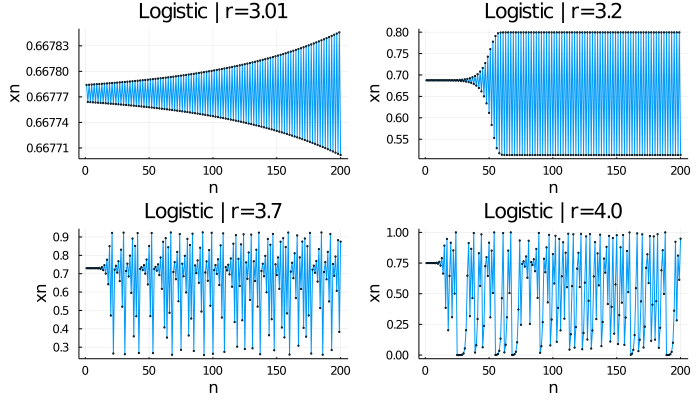

In [383]:
ϵ = 1e-5
rvals = 3.01, 3.2, 3.7, 4.

plots = Any[]
n_steps = 200
for r in rvals
    x0 = 1 - 1 / r
    p = plot_logistic_hist(x0 + ϵ, r, n_steps)
    append!(plots, (p,))
end

plot(plots..., size=(700, 400))


In [ ]:
r_vals = 0.9:0.01:4

iterated_values = zeros(0)
iterated_r_values = zeros(0)

x0 = 0.2
n_steps = 10_000
sample_size = 300
xrange = collect(0:100:sample_size)
xrange_ticks = string.(collect(xrange_ticks))
@gif for r in r_vals
    truncated_hist = round.(logistic_hist(x0, r, n_steps)[end-sample_size:end], digits=5)
    iterated_r = unique(truncated_hist)
    n_unique = size(iterated_r)
    append!(iterated_values, iterated_r)
    append!(iterated_r_values, ones(n_unique) .* r)
    # Bifurcation map
    p1 = scatter(iterated_r_values, iterated_values, markersize=2, markerstrokewidth=0, label=nothing)
    plot!(title="Bifurcation Map", xlabel=L"r", ylabel=L"x^* = f(x^*, r)")
    # trajectory
    p2 = plot(truncated_hist, label="r=$r", xlabel=L"n")
    plot!(xlabel=L"r", title=L"x_{n+1} = %$r x_n (1 - x_n)")
    ylims!(0, 1)
    xticks!(xrange, xrange_ticks)
    # Show everything
    plot(p1, p2, size=(700, 200))
end

In [ ]:
scatter(iterated_r_values, iterated_values, markersize=1, markerstrokewidth=0, label=nothing)

In [422]:
(0:100:300)

4-element Array{Int64,1}:
   0
 100
 200
 300

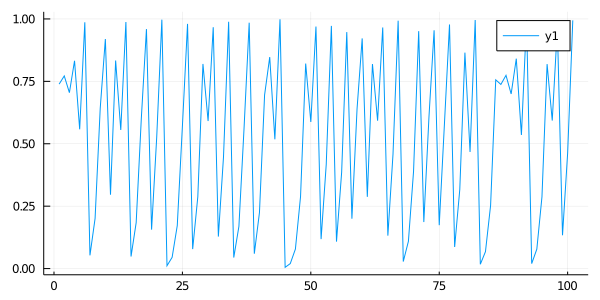

In [393]:
plot(round.(logistic_hist(x0, r, 50_000)[end-100:end], digits=5))

In [385]:
n_rvals= size(iterated_r_values)[1]

init_r_array = Array{Bool}(undef, 1)
for n=1:n_rvals
    if n == 1
        append!(init_r_array, true)
    elseif iterated_r_values[n-1] == iterated_r_values[n]
        append!(init_r_array, false)
    else
        append!(init_r_array, true)
    end
end
init_r_array[end-100:end] .= true;

In [391]:
iterated_r_values

4401-element Array{Float64,1}:
 0.8
 0.81
 0.82
 0.83
 0.84
 0.85
 0.86
 0.87
 0.88
 0.89
 0.9
 0.91
 0.92
 ⋮
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/misc/2021-04/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/w4QRq/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/misc/2021-04/tmp.gif")
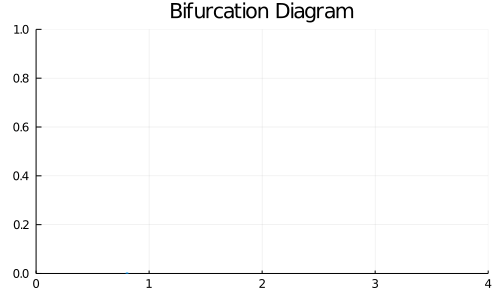

In [386]:
@gif for n=1:n_rvals
    plot(title="Bifurcation Diagram")
    scatter!(iterated_r_values[begin:n], iterated_values[begin:n],
                markersize=2,
                markerstrokewidth=0,
                label=nothing,
                size=(500, 300),
                ylim=(0, 1), xlim=(0, 4))
end when init_r_array[n]

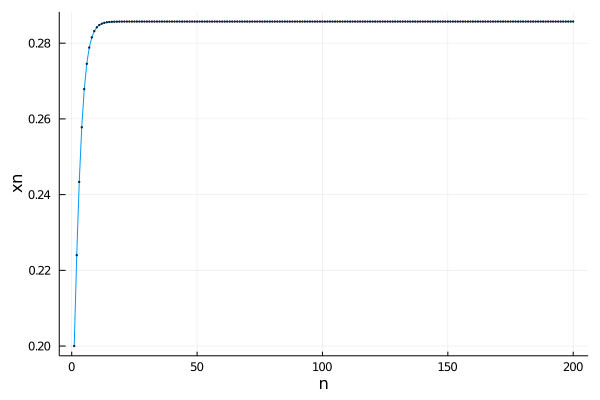

In [266]:
x0, r = 0.2, 1.4
plot_logistic_hist(x0, r, 200)
plot!(title="")

In [267]:
Random.seed!(3145)
rand(Bernoulli(0.45), 6)

6-element Array{Bool,1}:
 1
 0
 1
 0
 0
 0

In [283]:
default(size=(600, 300))

In [346]:
x0, r = 6/7, 3.5
plot_logistic_hist(x0, r, 200)
plot!(title="")
savefig("map1.pdf")

In [347]:
x0, r = 6/7 - 0.001, 3.5
plot_logistic_hist(x0, r, 200)
plot!(title="")
savefig("map2.pdf")

In [348]:
x0, r = 13/18 - 0.01, 3.6
plot_logistic_hist(x0, r, 200)
plot!(title="")
savefig("map3.pdf")

In [349]:
x0, r = 0.3, 4.0
plot_logistic_hist(x0, r, 200)
plot!(title="")
savefig("map4.pdf")

In [350]:
x0, r = 2/9, 4.0
plot_logistic_hist(x0, r, 200)
plot!(title="")
savefig("map5.pdf")

In [211]:
r = 3.2
x0 = 1/32 * (21 + sqrt(21))
plot_logistic_hist(x0, r, 90)
plot!(title="")
savefig("map1.pdf")

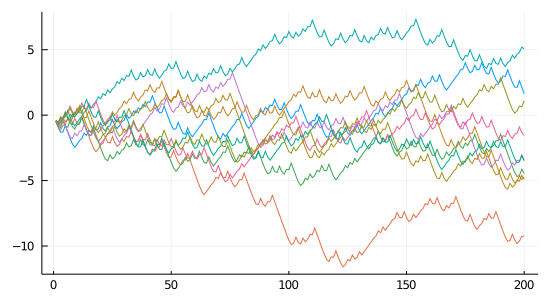

In [177]:
r = 4.0
x0_vals = range(0.01, 0.1, length=10)
trajectories = hcat(logistic_hist.(x0_vals, r, 200)...) .- 0.5
trajectories = cumsum(trajectories, dims=1)

plot(trajectories, label=nothing, size=(550, 300))
# plot!(title=L"X_{N} = \sum_{n=1}^{N-1} \left[4x_n (1-x_n) - 0.5\right]")
#savefig("chaos_process.pdf")

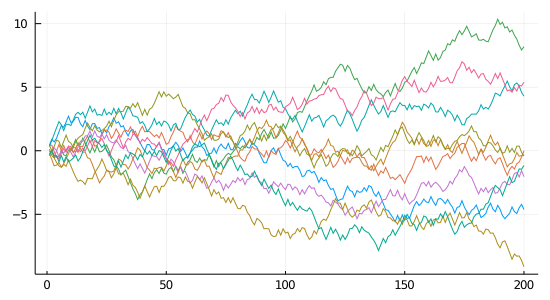

In [178]:
Random.seed!(314)
simulations = cumsum(rand(Arcsine(0, 1), (200, 10)) .- 0.5, dims=1)
plot(simulations, label=nothing, size=(550, 300))

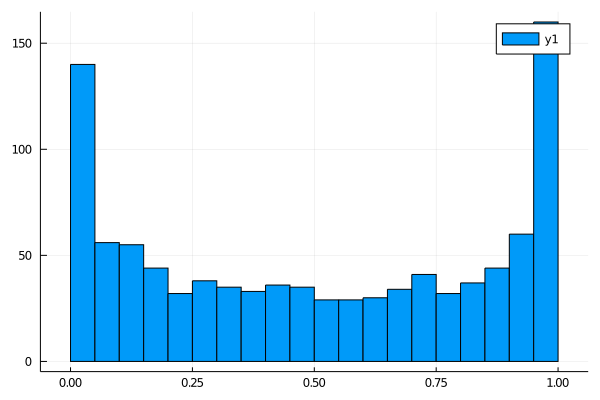

In [174]:
histogram(rand(Arcsine(0, 1), 1000), bins=30)

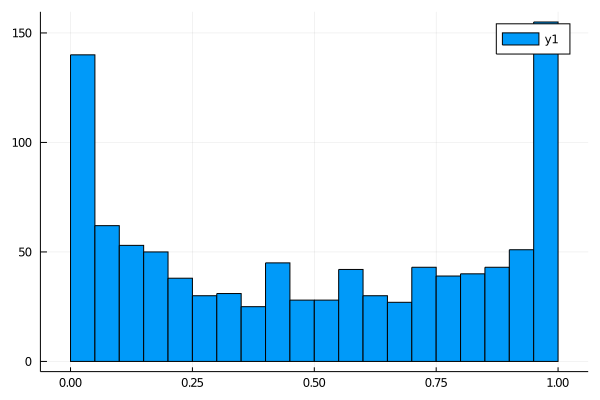

In [165]:
histogram(logistic_hist(0.05, 4.0, 1000), bins=30)

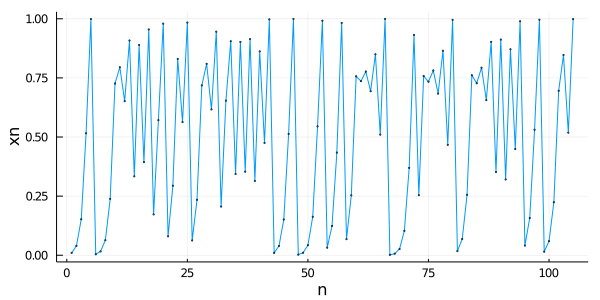

In [267]:
x0, r = 0.01, 4.0
plot_logistic_hist(x0, r, 105)
plot!(title="")